In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6-cs104.ipynb")

# Homework 6: Probability, Simulation, Estimation, and Assessing Models

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html)

**Recommended Readings**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)




Recall that in homework, even though tests may say 100% passed, it doesn't mean your final grade will be 100%.
The tests in this homework are quite weak, often just indicating that the answer is the right type or style.

Execute the following cell to load some modules that you will need.

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Roulette

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. Below is an example of a roulette wheel!

<img src="roulette_wheel.jpeg" width="330px">

The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.**
Run the cell below to load the `wheel` table.

In [3]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red ###
If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- if the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

**Question 1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer. **(4 points)**

*Note:* You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 2
 - 2
-->

In [4]:
def dollar_bet_on_red(color):
    if color == "red":
        return 1
    else:
        return -1


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Run the cell below to make sure your function is working.

In [6]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


**Question 2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. Your code should use the function `dollar_bet_on_red`. **(4 points)**

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 4
-->

In [7]:
red_winnings = wheel.apply(dollar_bet_on_red, 'Color')
wheel = wheel.with_column('Winnings: Red', red_winnings)
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Simulating 10 Bets on Red
Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

**Question 3.** Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. Your table should have the same three column labels as in `wheel`. Once you've created that table, set `sum_bets` to your net gain in all 10 bets, assuming that you bet one dollar on red each time. **(4 points)**

*Hint:* It may be helpful to print out `ten_bets` after you create it!

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 4
-->

In [9]:
# Simulate 10 spins by sampling 10 rows from the wheel table
ten_bets = wheel.sample(10)

# Calculate the total winnings by summing the "Winnings: Red" column
sum_bets = sum(ten_bets.column('Winnings: Red'))

# Display the table and net gain
ten_bets, sum_bets


(Pocket | Color | Winnings: Red
 10     | black | -1
 1      | red   | 1
 32     | red   | 1
 31     | black | -1
 5      | red   | 1
 35     | black | -1
 4      | black | -1
 35     | black | -1
 23     | red   | 1
 10     | black | -1,
 -2)

In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

**Question 4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain in that number of one-dollar bets on red. **(4 points)**

*Hint:* You should use your `wheel` table within your function.

<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 4
-->

In [11]:
def net_gain_red(num_bets):
    # Sample the specified number of bets from the wheel table
    bets = wheel.sample(num_bets)
    
    # Calculate the net gain by summing the "Winnings: Red" column
    net_gain = sum(bets.column('Winnings: Red'))
    
    return net_gain


In [12]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Run the cell below a few times to make sure that the results are similar to those you observed in the previous exercise.

In [13]:
net_gain_red(10)

-2

**Question 5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `all_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red. **(4 points)**

*Hint:* Think about which computational tool might be helpful for simulating a process multiple times. Lab 5 might be a good resource to look at!

*Note:* This cell might take a few seconds to run.

<!--
BEGIN QUESTION
name: q1_5
manual: false
points:
 - 0
 - 4
-->

In [14]:
num_bets = 200
repetitions = 10000

all_gains_red = np.array([net_gain_red(num_bets) for _ in range(repetitions)])
...

len(all_gains_red) # Do not change this line! Check that all_gains_red is length 10000.

10000

In [15]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Run the cell below to visualize the results of your simulation.

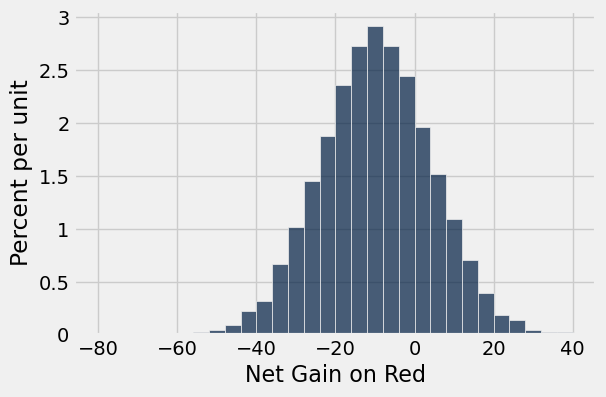

In [16]:
gains = Table().with_columns('Net Gain on Red', all_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

**Question 6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question. **(4 points)**

<!--
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 4
-->

In [17]:
loss_more_than_50 = True

In [18]:
grader.check("q1_6")

q1_6 results: All test cases passed!

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

**Question 7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

*Hint:* Remember that the pockets are represented as strings.

<!--
BEGIN QUESTION
name: q1_7
manual: false
points:
 - 2
 - 1
 - 1
-->

In [19]:
def dollar_bet_on_split(pocket):
    if pocket == "5" or pocket == "6":
        return 17
    else:
        return -1


In [20]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Run the cell below to check that your function is doing what it should.

In [21]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


**Question 8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

<!--
BEGIN QUESTION
name: q1_8
manual: false
points:
 - 0
 - 4
-->

In [22]:
split_winnings = wheel.apply(dollar_bet_on_split, 'Pocket')
wheel = wheel.with_column('Winnings: Split', split_winnings)
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


In [23]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `all_gains_split`. **(4 points)**

*Hint:* Your code in Questions 4 and 5 may be helpful here!

<!--
BEGIN QUESTION
name: q1_9
manual: false
points:
 - 0
 - 4
-->

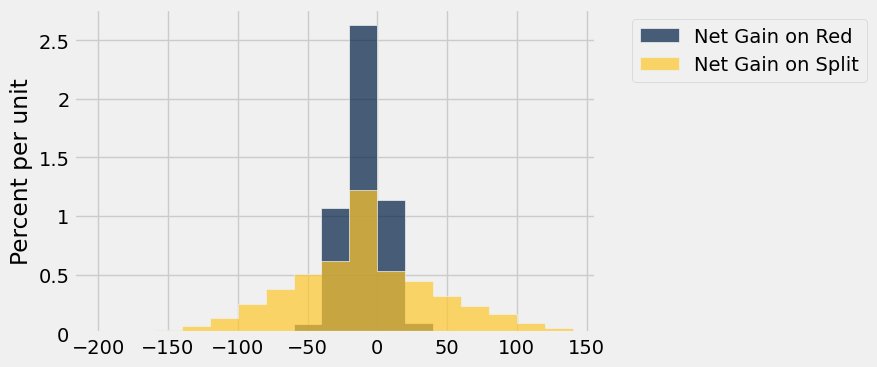

In [24]:

# Define the number of bets per simulation and the number of repetitions
num_bets = 200
repetitions = 10000

# Define a function to simulate 200 bets on the 5-6 split
def net_gain_split(num_bets):
    bets = wheel.sample(num_bets)
    return sum(bets.column('Winnings: Split'))

# Use a list comprehension to repeat the simulation 10,000 times
all_gains_split = np.array([net_gain_split(num_bets) for _ in range(repetitions)])

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', all_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

In [25]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 10.** Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram. **(4 points)**

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

*Hint:* We've already seen one of these statements in a prior question.

<!--
BEGIN QUESTION
name: q1_10
manual: false
points:
 - 0
 - 0
 - 4
-->

In [26]:
histogram_statements = np.array([1, 2, 3])

In [27]:
grader.check("q1_10")

q1_10 results: All test cases passed!

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

## 2. Chances

Before you do this exercise, make sure you understand the logic behind all the examples in [Section 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html). 

Good ways to approach probability calculations include:

- Thinking one trial at a time: What does the first one have to be? Then what does the next one have to be?
- Breaking up the event into distinct ways in which it can happen.
- Seeing if it is easier to find the chance that the event does not happen.

### Finding Chances

On each spin of a roulette wheel, all 38 pockets are equally likely to be the winner regardless of the results of other spins. Among the 38 pockets, 18 are red, 18 black, and 2 green. In each part below, write an expression that evaluates to the chance of the event described.

**Question 1.** The winning pocket is black on all of the first three spins. **(4 points)**

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 4
-->

In [28]:
first_three_black = (18 / 38) ** 3

In [29]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** The color green never wins in the first 10 spins. **(4 points)**

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 4
-->

In [30]:
no_green = (36 / 38) ** 10

In [31]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 3.** The color green wins at least once on the first 10 spins. **(4 points)**

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 4
-->

In [32]:
at_least_one_green = 1 - (36 / 38) ** 10

In [33]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4.** Two of the three colors never win in the first 10 spins. **(4 points)**

*Hint:* Imagine the event with the colors red, yellow, and orange. What situation(s) lead to two of the three colors never winning in the first 10 spins?

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 0
 - 4
-->

In [34]:
lone_winners = (18 / 38) ** 10 + (18 / 38) ** 10 + (2 / 38) ** 10


In [35]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Comparing Chances
In each of Questions 5-7, two events A and B are described. Choose from one of the following three options and set each answer variable to a single integer:

1. Event A is more likely than Event B
2. Event B is more likely than Event A
3. The two events have the same chance.

You should be able to make the choices **without calculation**. Good ways to approach this exercise include imagining carrying out the chance experiments yourself, one trial at a time, and by thinking about the [law of averages](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#the-law-of-averages).

**Question 5.** A child picks four times at random from a box that has four toy animals: a bear, an elephant, a giraffe, and a kangaroo. **(4 points)**

- Event A: all four different animals are picked (assuming the child picks without replacement)
- Event B: all four different animals are picked (assuming the child picks with replacement)

<!--
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 0
 - 4
-->

In [36]:
toys_option = 1

In [37]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 6.** In a lottery, two numbers are drawn at random with replacement from the integers 1 through 1000. **(4 points)**

- Event A: The number 8 is picked on both draws
- Event B: The same number is picked on both draws

<!--
BEGIN QUESTION
name: q2_6
manual: false
points:
 - 0
 - 0
 - 4
-->

In [38]:
lottery_option = 2

In [39]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 7.** A fair coin is tossed repeatedly. **(4 points)**

- Event A: There are 60 or more heads in 100 tosses
- Event B: There are 600 or more heads in 1000 tosses

*Hint*: Think about the law of averages!

<!--
BEGIN QUESTION
name: q2_7
manual: false
points:
 - 0
 - 0
 - 4
-->

In [40]:
coin_option = 1

In [41]:
grader.check("q2_7")

q2_7 results: All test cases passed!

## 3. Three Ways Python Draws Random Samples

You have learned three ways to draw random samples using Python:

- `tbl.sample` draws a random sample of rows from the table `tbl`. The output is a table consisting of the sampled rows. 

- `np.random.choice` draws a random sample from a population whose elements are in an array. The output is an array consisting of the sampled elements.

- `sample_proportions` draws from a categorical distribution whose proportions are in an array. The output is an array consisting of the sampled proportions in all the categories. 

In [42]:
# Look through this code and run this cell for questions 1 and 2
top = Table.read_table('top_movies_2017.csv').select(0, 1)
top.show(3)

Title,Studio
Gone with the Wind,MGM
Star Wars,Fox
The Sound of Music,Fox


In [43]:
# Look through this code and run this cell for questions 1 and 2
studios_with_counts = top.group('Studio').sort('count', descending=True)
studios_with_counts.show(3)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25


In [44]:
# Look through this code and run this cell for questions 1 and 2
studios_of_all_movies = top.column('Studio')
distinct_studios = studios_with_counts.column('Studio')

print("studios_of_all_movies:", studios_of_all_movies[:10], "...")
print("\n distinct_studios:", distinct_studios)

studios_of_all_movies: ['MGM' 'Fox' 'Fox' 'Universal' 'Paramount' 'Paramount' 'Universal' 'MGM'
 'Warner Brothers' 'Disney'] ...

 distinct_studios: ['Buena Vista' 'Warner Brothers' 'Paramount' 'Fox' 'Universal' 'Disney'
 'Columbia' 'MGM' 'United Artists' 'Newline' 'Paramount/Dreamworks' 'Sony'
 'Dreamworks' 'Lionsgate' 'RKO' 'Tristar' 'AVCO' 'IFC' 'Metro' 'NM' 'Orion'
 'Selz.' 'Sum.']


In [45]:
# Look through this code and run this cell for questions 1 and 2
studio_counts_only = studios_with_counts.column('count')
studio_proportions_only = studio_counts_only / sum(studio_counts_only)

print("studio_counts_only:", studio_counts_only)
print("\n studio_proportions_only:", studio_proportions_only)

studio_counts_only: [35 29 25 24 23 11  9  7  6  5  4  4  3  3  3  2  1  1  1  1  1  1  1]

 studio_proportions_only: [ 0.175  0.145  0.125  0.12   0.115  0.055  0.045  0.035  0.03   0.025
  0.02   0.02   0.015  0.015  0.015  0.01   0.005  0.005  0.005  0.005
  0.005  0.005  0.005]


In Questions 1 and 2, we will present a scenario. Determine which three of the following six options are true in regards to what the question is asking, and list them in the following answer cell. If your answer includes any of (i)-(iii), state what you would fill in the blank to make it true: `top`, `studios_with_counts`, `studios_of_all_movies`, `distinct_studios`, `studio_counts_only` or `studio_proportions_only`.

(i) This can be done using `sample` and the table _________.

(ii) This can be done using `np.random.choice` and the array ________.

(iii) This can be done using `sample_proportions` and the array _______.

(iv) This cannot be done using `sample` and the data given.

(v) This cannot be done using `np.random.choice` and the data given.

(vi) This cannot be done using `sample_proportions` and the data given.

<!-- BEGIN QUESTION -->

**Question 1.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Outputs True if Paramount appears more often than Warner Brothers among studios that released the sampled movies, and False otherwise. **(4 points)**

*Example Answer:* (i) studios_of_all_movies, (iii) top, (v)

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->

(i) studios_of_all_movies, (ii) distinct_studios, (v)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Outputs True if the first sampled movie was released by the same studio as the last sampled movie. **(4 points)**

*Example Answer:* (i) studios_of_all_movies, (iii) top, (v)

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

(i) studios_of_all_movies, (ii) distinct_studios, (v)

<!-- END QUESTION -->



## 4. Assessing Jade's Models

Before you begin, [Section 10.4](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html) of the textbook is a useful reference for this part.

### Games with Jade
Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

**Question 1.** Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. **(4 Points)**

<!--
BEGIN QUESTION
name: q4_1
manual: false
points:
 - 0
 - 0
 - 1
 - 3
-->

In [46]:
deck_model_probabilities = np.array([4/13, 9/13])
deck_model_probabilities


array([ 0.30769231,  0.69230769])

In [47]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 2.** We believe Jade's model is incorrect. In particular, we believe there to be a *larger* chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. **(5 Points)**

1. The distance (absolute value) between the actual number of face cards in 13 draws and 4, the expected number of face cards in 13 draws
2. The expected number of face cards in 13 draws, 4
3. The number of face cards we get in 13 draws

<!--
BEGIN QUESTION
name: q4_2
manual: false
points:
 - 0
 - 0
 - 5
-->

In [48]:
statistic_choice = 3
statistic_choice

3

In [49]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 3.** Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of face cards in one simulation of drawing cards under the model specified in `model_proportions`. **(5 Points)**

*Hint:* Think about how you can use the function `sample_proportions`. 

<!--
BEGIN QUESTION
name: q4_3
manual: false
points:
 - 5
-->

In [50]:


def deck_simulation_and_statistic(sample_size, model_proportions):
    # Generate a random draw of sample_size, based on model_proportions
    sampled_counts = np.random.multinomial(sample_size, model_proportions)
    
    # Return the number of face cards
    return sampled_counts[0]

# Testing the function with sample size 13 and the given deck_model_probabilities
deck_simulation_and_statistic(13, deck_model_probabilities)


4

In [51]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.** Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. **(5 Points)**

<!--
BEGIN QUESTION
name: q4_4
manual: false
points:
 - 2
 - 3
-->

In [52]:
# Running 5000 simulations of drawing 13 cards under Jade's model probabilities
repetitions = 5000
deck_statistics = []

# Collecting statistics for each simulation run
for _ in range(repetitions):
    # Use the function from Q4_3 to get the number of face cards
    face_cards_count = deck_simulation_and_statistic(13, deck_model_probabilities)
    deck_statistics.append(face_cards_count)

# Converting the list to an array for easier handling in further analysis

deck_statistics = np.array(deck_statistics)
deck_statistics


array([4, 4, 1, ..., 4, 6, 2], dtype=int32)

In [53]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Let’s take a look at the distribution of simulated statistics.

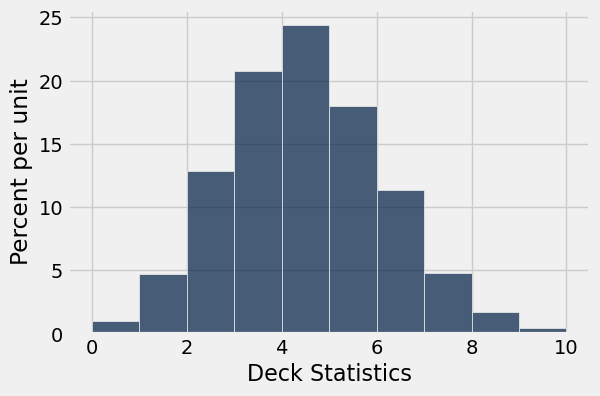

In [54]:
# Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

<!-- BEGIN QUESTION -->

**Question 5.** Given your observed value, do you believe that Jade's model is reasonable, or is our alternative (that our deck is rigged) more likely? Explain your answer using the histogram produced above. **(5 Points)**

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->

To determine whether Jade's model is reasonable, we compare our observed result of 8 face cards in 13 draws to the distribution of face card counts generated under Jade's model. If the observed value of 8 face cards is higher than most simulated values under her model, it suggests that the drawing of 8 face cards is unlikely if the deck follows her specified probabilities, thus supporting our alternative hypothesis that the deck is rigged.

After examining the histogram, if we see that values close to 8 face cards fall into the higher range, this would indicate that achieving 8 face cards in a fair deck scenario Jade's model is rare. Therefore, our observation would lean us toward believing that the deck is rigged, as we observed a number of face cards that the model predicts to occur infrequently.

Congratulations, you are done with Homework 6.

**Important submission steps:** 

1. Run the tests and verify that they all pass.
2. Choose **Save and Checkpoint** from the **File** menu.
4. Go to Canvas and submit the Jupyter notebook file (hw6-cs104.ipynb) to the CS104 HW6 assignment.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [55]:
grader.check_all()

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!